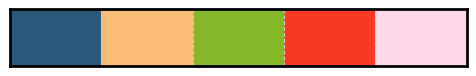

In [39]:
from runner import *
from process_results import *
import os
import pandas as pd
import matplotlib.pyplot as plt

fig_dir = os.path.expanduser("~") + "/repos/exchain-paper/figs"

import seaborn as sns

sns.set_style("whitegrid", {'axes.grid' : True})
sns.set_context("paper", font_scale=1.5)

plt.rcParams.update({'axes.edgecolor': 'black', 'axes.linewidth': 2, 'axes.grid': True, 'grid.linestyle': '--'})
plt.rcParams['figure.figsize'] = 4, 3

# colors = ['#FB8072', '#80B1D3', '#FDB462', '#B3DE69', '#FCCDE5', '#8DD3C7', '#FFFFB3', '#BEBADA']
colors = ['#2A587A', '#FABC75', '#83B828', '#F83A25', '#FDD8EB']
# colors = ['#648FFF', '#FFB000', '#DC267F','#FE6100', '#785EF0']
sns.palplot(colors)
sns.set_palette(sns.color_palette(colors), 5, 1)
# sns.set_palette("ch:start=.2,rot=-.3")
line_style = dict(linewidth = 2, markersize = 8, err_style = "bars", dashes = False)
sub_figure_title = {"fontweight": 700, 'fontname':'Times New Roman', 'fontsize': 18}
plt.tight_layout()

In [10]:
table_data = []

for name, app in TEST_APPLICATIONS.items():
    table_data.append([])
    table_data[-1].append(name.replace("_", "-").upper())
    ground_truth = app.read_ground_truth()
    dynamic_dependency = app.read_latest_dynamic_dependency()
    root_cause_in_log = check_root_cause_in_log(ground_truth, app.origin_log_path)
    table_data[-1].append(app.is_running_service)
    table_data[-1].append(app.is_async)
    table_data[-1].append(root_cause_in_log)

    table_data[-1].append(get_exception_distance(ground_truth,
                                                   os.path.join(app.get_latest_result("dynamic"), "exception.json")))


    dynamic_result_path = app.get_latest_result("dynamic")
    exceptions = read_exceptions(os.path.join(dynamic_result_path, "exception.json"))
    table_data[-1].append(len(exceptions))
    ground_truth = app.read_ground_truth()
    dynamic_dependency = app.read_latest_dynamic_dependency()


    static_dependency = app.read_latest_static_dependency()
    table_data[-1].extend(process_dependency_result(static_dependency, ground_truth))

    hybrid_online, hybrid_offline = app.read_latest_hybrid_dependency()
    table_data[-1].extend(process_dependency_result(hybrid_online + hybrid_offline, ground_truth))
    table_data[-1].extend(process_dependency_result(dynamic_dependency, ground_truth))
save_as_latex_table(table_data, os.path.join(fig_dir, "issue_result.tex"))

org.apache.wicket.markup.MarkupException:Unable to find component with id 'renderCount' in [Page class = org.apache.wicket.testapplication.TestPage2, id = 1, render count = 1]	Expected: ':renderCount'.	Found with similar names: '':org.apache.wicket.markup.MarkupStream/throwMarkupException:534 -> java.lang.RuntimeException:model still attached!:org.apache.wicket.testapplication.TestPage/onBeforeRender:49

org.apache.wicket.markup.MarkupException:Unable to find component with id 'renderCount' in [Page class = org.apache.wicket.testapplication.TestPage2, id = 1, render count = 1]	Expected: ':renderCount'.	Found with similar names: '':org.apache.wicket.markup.MarkupStream/throwMarkupException:534 -> java.lang.RuntimeException:model still attached!:org.apache.wicket.testapplication.TestPage/onBeforeRender:49



In [2]:

table_data = []

perf_result = {}
for name, app in BENCH_APPLICATIONS.items():
    separate_results = ["fineract_bench", "jena_bench"]
    if "jena" in name:
        continue
    read_perf_result(app, perf_result)
print(perf_result.keys())
save_perf_data_to_latex_table(perf_result, os.path.join(fig_dir, "perf_result.tex"))



dict_keys(['latency', 'throughput', 'exec_time'])
{'latency': {'FINERACT': [17.046599999999998, 0.3042817407893179, 17.8732, 0.5189184907092833, '4.8\\%', 18.867700000000003, 0.45249801718411486, '10.7\\%', 700.8226, 84.71400810990143, '4011.2\\%'], 'HADOOP': [1.3843333333333334, 0.0025540454475494277, 1.3953333333333333, 0.002269973078646053, '0.8\\%', 1.6867833333333333, 0.005919104870597935, '21.8\\%', 2.911175, 0.033466365324377335, '110.3\\%'], 'WICKET': [14.276800000000003, 0.6578304070537055, 15.8012, 0.3742844432306054, '10.7\\%', 17.265500000000003, 0.9842494320264783, '20.9\\%', 142.92430000000002, 6.921903239395617, '901.1\\%'], 'TOMCAT': [7.9444, 0.3450594795748184, 8.6096, 0.6112192187205286, '8.4\\%', 9.0586, 0.36038935734686856, '14.0\\%', 148.1363, 8.307001130906919, '1764.7\\%']}, 'throughput': {'FINERACT': [1173.5900000000001, 21.058380754464466, 1119.8200000000002, 31.53293375363464, '-4.6\\%', 1060.5529999999999, 25.418624864457193, '-9.6\\%', 28.961000000000002, 3.

In [1]:

table_data = []

for name, app in TEST_APPLICATIONS.items():
    ground_truth = app.read_ground_truth()
    table_data.append([])
    table_data[-1].append(name.replace("_", "-").upper())
    t1 = open(os.path.join(app.out_path, "static-results", "time.txt")).read().strip()
    t2 = open(os.path.join(app.out_path, "static-results", "time.naive.txt")).read().strip()

    static_dependency = app.read_latest_naive_static_dependency()
    print(process_dependency_result(static_dependency, ground_truth))
    print(name, t1, t2)
    table_data[-1].append("\\xmark")
    table_data[-1].append(float(t1))
    table_data[-1].append(float(t2))
save_as_latex_table(table_data, os.path.join(fig_dir, "static-cmp.tex"))

NameError: name 'TEST_APPLICATIONS' is not defined

/tmp/ipykernel_1089664/3316677659.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv("./data/result.csv", header=0, sep=',\s+',)


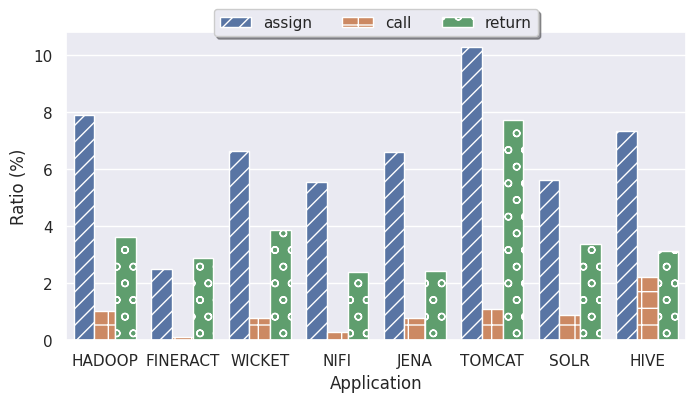

In [42]:
data = pd.read_csv("./data/result.csv", header=0, sep=',\s+',)
data["Name"] = data["Name"].str.upper()
plt.rcParams['figure.figsize'] = 8, 4
draw_dist(data, os.path.join(fig_dir, "app-dist.pdf"))
